**Logistic Regression**

Logistic Regression model computes a weighted sum of the input features ( plus bias ) and outputs the logistic of this result

The logistic function is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.

**Estimating Probabilities**

Just like a Linear Regression model, a Logistic Regression model computes a
weighted sum of the input features (plus a bias term), it outputs the logistic of this result
(instead of outputting the result directly like the Linear Regression model does).

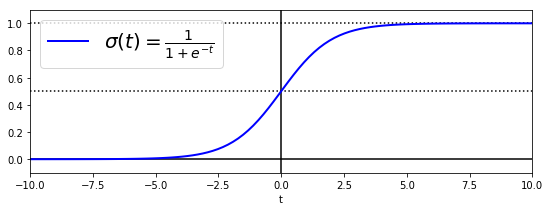

In [11]:

import numpy as np
#plot the results
import matplotlib.pyplot as plt
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

Once the Logistic Regression model has estimated the probability $^P= hθ(x)$ that an instance x belongs to
the positive class, it can make its prediction ŷ 

$ŷ = 0 if ^p < 0.5$
$ŷ = 1 if ^p < 0.5$

σ(t) < 0.5 when t < 0, and 
σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if
$θT · x$ is positive, 
and 0 if it is negative.

**Training and Cost Function**

The objective of training is to set the parameter vector θ so that the model estimates
high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This
idea is captured by the cost function shown in for a single training instance x

Cost function of a single training instance
if y= 1 then c(θ)=-log(^p)
if y= 0 then c(θ)=-log(1-^p)


Regarding this cost function: – log(t) grows very large when t approaches 0, so the cost will
be large if the model estimates a probability close to 0 for a positive instance, and it will also be very
large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is
close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a
negative instance or close to 1 for a positive instance, which is precisely what we want.
The cost function over the whole training set is simply the average cost over all training instances. It can
be written in a single expression  called the log loss.

**The bad news is that there is no known closed-form equation to compute the value of $θ$ that minimizes this
cost function (there is no equivalent of the Normal Equation).** 
**But the good news is that this cost function
is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global
minimum** (if the learning rate is not too large and you wait long enough).

4_18
Regarding this equation : for each instance it computes the prediction error and
multiplies it by the $jth$ feature value, and then it computes the average over all training instances. Once you
have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descentalgorithm. That’s it: so a Logistic Regression model is trained. For Stochastic GD you
would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a
time.

In [ ]:
**Decision Boundaries**

In [13]:
#Let’s try to build a classifier to detect the Iris-Virginica 
#type based only on the petal width feature. First
#let’s load the data:

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target_names', 'feature_names', 'target', 'DESCR']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [14]:
#Now let’s train a Logistic Regression model:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

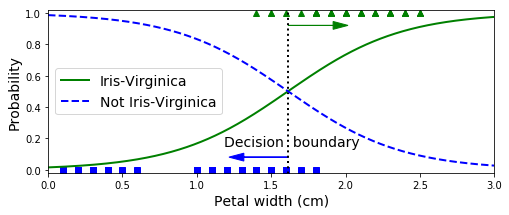

In [18]:
#Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while
the other iris flowers (are Iris-Setosa and Iris Versicolor are represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. 
Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the
flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict()
method rather than the predict_proba() method), it will return whichever class is the most likely.
Therefore, **there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if
the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else
it will predict that it is not (even if it is not very confident)**:

In [19]:
decision_boundary

array([1.61561562])

In [20]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The following figure shows the **same dataset but this time displaying two features: petal width and length**. Once
trained, the Logistic Regression classifier can estimate the probability that **a new flower is an Iris-Virginica based on these two features.** The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. 
Note that it is a linear boundary. Each parallel
line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90%
(top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica
according to the model

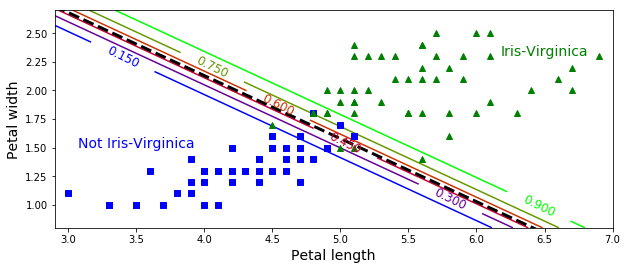

In [22]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

Just like the other linear models, Logistic Regression models can be regularized using $ℓ1$ or $ℓ2$ penalties.
Scitkit-Learn actually adds an $ℓ2$ penalty by default.


Note regarding Scikit-Learn: The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

**Softmax Regression**

The Logistic Regression model can be generalized to 
support multiple classes directly, without having to
train and combine multiple binary classifiers.
This is called Softmax Regression, or Multinomial Logistic Regression.

when given an instance $x$, the Softmax Regression model first computes a score
$sk(x)$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $sk(x)$ should look familiar, as
it is just like the equation for Linear Regression prediction.
Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the
highest estimated probability (which is simply the class with the highest score),
argmax k ((θ)kT*x)
The argmax operator returns the value of a variable that maximizes a function. In this equation, it
returns the value of k that maximizes the estimated probability $σ(s(x))k$
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) **so it should be used only
with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.**

Now that we know how the model estimates probabilities and makes predictions, let’s take a look at
training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function called the cross entropy, should lead to this objective because it penalizes the model when it
estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set
of estimated class probabilities match the target classes (we will use it again several times in the
following chapters).


In [23]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

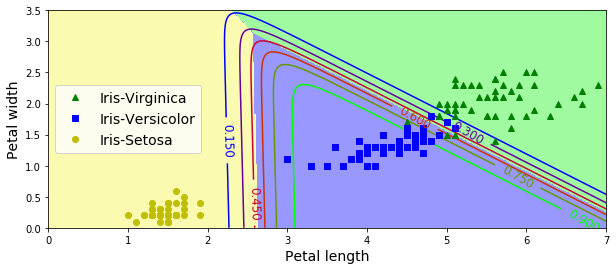

In [24]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other
optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.
Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s
LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you
can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.
You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-
Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

shows the resulting decision boundaries, represented by the background colors. Notice that
the decision boundaries between any two classes are linear. The figure also shows the probabilities for
the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the
45% probability boundary). Notice that the model can predict a class that has an estimated probability
below 50%. For example, at the point where all decision boundaries meet, all classes have an equal
estimated probability of 33%.